In [1]:
import sys
import collections
from collections import Counter

import datetime
from datetime import datetime, timedelta, timezone
import dateutil.parser

from collections import defaultdict

import yaml

import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 999

import pytz
from pytz import timezone

import pydent
from pydent import AqSession, models
from pydent.models import Sample, Item, Plan

sys.path.append("../ext-plan-pydent")
from plans import ExternalPlan

In [2]:
filename = '../ext-plan-pydent/config.yml'

with open(filename, 'r') as f:
    config = yaml.load(f)

login = config['aquarium']['production']

session = AqSession(
    login['username'],
    login['password'],
    login['url']
)

me = session.User.where({'login': login['username']})[0]
print('Logged in as %s\n' % me.name)

Logged in as Devin Strickland



In [3]:
ot = session.OperationType.find_by_name("Make Miniprep")
print(ot)

{'category': 'Cloning',
 'codes': <HasManyGeneric (model=Code, callback=where_callback, params=(<function HasMany.__init__.<locals>.callback_args at 0x11e53b2f0>,))>,
 'cost_model': <One (model=Code, callback=get_code_callback, params=('cost_model',))>,
 'created_at': '2017-07-12T19:25:39.000-07:00',
 'deployed': True,
 'documentation': <One (model=Code, callback=get_code_callback, params=('documentation',))>,
 'field_types': <Many (model=FieldType, callback=where_callback, params=(<function OperationType.<lambda> at 0x11e53b268>,))>,
 'id': 30,
 'name': 'Make Miniprep',
 'on_the_fly': False,
 'operations': <HasMany (model=Operation, callback=where_callback, params=(<function HasMany.__init__.<locals>.callback_args at 0x11e53b1e0>,))>,
 'precondition': <One (model=Code, callback=get_code_callback, params=('precondition',))>,
 'protocol': <One (model=Code, callback=get_code_callback, params=('protocol',))>,
 'rid': 5,
 'updated_at': '2017-07-12T19:27:32.000-07:00',
 'user': <HasOne (mod

In [4]:
ops = ot.operations

In [5]:
obj_type = session.ObjectType.find_by_name("Plasmid Stock")

In [6]:
print(obj_type)

{'cleanup': 'No cleanup information',
 'columns': None,
 'cost': 2.0,
 'created_at': '2013-10-15T10:01:41.000-07:00',
 'data': 'concentration:',
 'description': 'A 1.5 mL tube containing purified plasmid DNA',
 'handler': 'sample_container',
 'id': 208,
 'image': '',
 'max': 1,
 'min': 0,
 'name': 'Plasmid Stock',
 'prefix': 'M20',
 'release_description': '',
 'release_method': 'return',
 'rid': 6765,
 'rows': None,
 'safety': 'No safety information',
 'sample_type_id': 2,
 'unit': 'Plasmid',
 'updated_at': '2014-05-09T16:10:47.000-07:00',
 'vendor': 'No vendor information'}


In [7]:
pacific = timezone('US/Pacific')

window_start = pacific.localize(datetime(2018, 1, 1))
print(window_start)

2018-01-01 00:00:00-08:00


In [8]:
minipreps = session.Item.where("sample_id = 21264 AND object_type_id = 208 AND updated_at >= '{}'".format(window_start))

In [9]:
print(len(minipreps))

228


In [10]:
item_ids = [i.id for i in minipreps]

In [11]:
das = session.DataAssociation.where({"parent_class": "Item", "parent_id": item_ids})
print(len(das))

453


In [12]:
concs = [da for da in das if da.key == 'concentration']
x = [dateutil.parser.parse(c.updated_at) for c in concs]
y = [float(c.value) for c in concs]

In [13]:
print(concs[0])
print(y[0])

{'created_at': '2017-10-10T09:15:27.000-07:00',
 'id': 117700,
 'key': 'concentration',
 'object': '{"concentration": 330.5}',
 'parent_class': 'Item',
 'parent_id': 107197,
 'rid': 7677,
 'updated_at': '2017-10-10T09:15:27.000-07:00',
 'upload': <HasOne (model=Upload, callback_args=lambda self: self.upload_id)>,
 'upload_id': None}
330.5


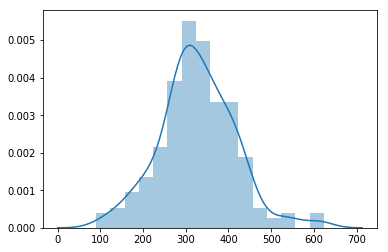

In [14]:
sns.distplot(y)